# **Loading the data:**

In [420]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [421]:
df = pd.read_csv('/content/drive/MyDrive/Project 2/SBAnational.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Cleaning:**

In [422]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [423]:
df = df.rename(columns={'LoanNr_ChkDgt':'ID'})

In [424]:
df = df.drop(['BalanceGross'], axis=1)

In [425]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','')

<ipython-input-425-3109f9f0d6e5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','')


In [426]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace(',','')

In [427]:
df['DisbursementGross'] = df['DisbursementGross'].str.strip()

In [428]:
df['DisbursementGross'] = pd.to_numeric(df['DisbursementGross'])

In [429]:
df['GrAppv'] = df['GrAppv'].str.replace('$','')

<ipython-input-429-6ee749f9bc79>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GrAppv'] = df['GrAppv'].str.replace('$','')


In [430]:
df['GrAppv'] = df['GrAppv'].str.replace(',','')

In [431]:
df['GrAppv'] = df['GrAppv'].str.strip()

In [432]:
df['GrAppv'] = pd.to_numeric(df['GrAppv'])

In [433]:
df['SBA_Appv'] = df['SBA_Appv'].str.replace('$','')

<ipython-input-433-23751f204a85>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['SBA_Appv'] = df['SBA_Appv'].str.replace('$','')


In [434]:
df['SBA_Appv'] = df['SBA_Appv'].str.replace(',','')

In [435]:
df['SBA_Appv'] = df['SBA_Appv'].str.strip()

In [436]:
df['SBA_Appv'] = pd.to_numeric(df['SBA_Appv'])

In [437]:
df['MIS_Status'] = df['MIS_Status'].str.strip()

In [438]:
df.isnull().sum() / len(df) * 100

ID                    0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

In [439]:
df.dtypes

ID                     int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
MIS_Status            object
ChgOffPrinGr          object
GrAppv               float64
SBA_Appv             float64
dtype: object

In [440]:
df.shape

(899164, 26)

In [441]:
df.corr()

,ID,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,GrAppv,SBA_Appv
ID,1.000000,0.027956,-0.060822,0.099793,0.009032,-0.040024,-0.022095,-0.023463,0.046296,-0.148337,0.057165,0.068952,0.077252
Zip,0.027956,1.000000,-0.034026,0.146074,0.014157,-0.038853,0.003632,0.003674,0.011398,-0.072798,0.092365,0.099452,0.105817
NAICS,-0.060822,-0.034026,1.000000,-0.111024,-0.038237,0.047053,-0.039376,-0.036587,0.027800,0.436724,-0.047576,-0.056521,-0.063106
Term,0.099793,0.146074,-0.111024,1.000000,0.046140,-0.073100,0.027581,0.024931,0.028940,-0.204080,0.466391,0.502610,0.524912
NoEmp,0.009032,0.014157,-0.038237,0.046140,1.000000,-0.040222,0.008626,0.015350,0.006376,-0.041824,0.088651,0.090430,0.092566
NewExist,-0.040024,-0.038853,0.047053,-0.073100,-0.040222,1.000000,-0.002130,-0.009128,0.124152,0.031701,-0.074405,-0.066506,-0.063976
CreateJob,-0.022095,0.003632,-0.039376,0.027581,0.008626,-0.002130,1.000000,0.993953,0.001038,-0.029924,0.006955,0.008182,0.013749
RetainedJob,-0.023463,0.003674,-0.036587,0.024931,0.015350,-0.009128,0.993953,1.000000,-0.000515,-0.024851,0.010274,0.010693,0.014891
FranchiseCode,0.046296,0.011398,0.027800,0.028940,0.006376,0.124152,0.001038,-0.000515,1.000000,-0.003776,0.059574,0.067896,0.069442
UrbanRural,-0.148337,-0.072798,0.436724,-0.204080,-0.041824,0.031701,-0.029924,-0.024851,-0.003776,1.000000,-0.035031,-0.058882,-0.070754


In [442]:
df.columns

Index(['ID', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

# **Urban vs Rural**

In [443]:
# what is the average term in rural and urban areas
# 1 = Urban
# 2 = Rural
# 0 = Undefined
URterm = df.groupby('UrbanRural').agg({'Term': [np.mean]})
URterm

,Term
,mean
UrbanRural,
0,136.300151
1,95.592448
2,100.286540


***Urban areas have a shorter loan term than Rural areas***

In [444]:
# SBA_appv is SBAs guaranteed loan approved amount
# Grappv is Gross amount of loan approved by bank
UrbanRuraldf = df.groupby('UrbanRural').agg({'GrAppv': [np.mean], 'SBA_Appv': [np.mean]})
UrbanRuraldf


,GrAppv,SBA_Appv
,mean,mean
UrbanRural,,
0,219242.891870,176004.561567
1,176816.995432,133034.581187
2,182124.095839,141659.273127


In [445]:
UrbanRuraldf.reset_index()

,UrbanRural,GrAppv,SBA_Appv
,,mean,mean
0,0,219242.891870,176004.561567
1,1,176816.995432,133034.581187
2,2,182124.095839,141659.273127


In [446]:
UrbanRuraldf.columns = ['Average Bank Loan', 'Average SBA Guaranteed Loan Amount']

In [447]:
UrbanRuraldf = UrbanRuraldf.reset_index()

In [448]:
UrbanRuraldf

,UrbanRural,Average Bank Loan,Average SBA Guaranteed Loan Amount
0,0,219242.891870,176004.561567
1,1,176816.995432,133034.581187
2,2,182124.095839,141659.273127


In [449]:
UrbanRuraldf['Difference in Amount'] = UrbanRuraldf['Average Bank Loan'] - UrbanRuraldf['Average SBA Guaranteed Loan Amount']

In [450]:
UrbanRuraldf

,UrbanRural,Average Bank Loan,Average SBA Guaranteed Loan Amount,Difference in Amount
0,0,219242.891870,176004.561567,43238.330303
1,1,176816.995432,133034.581187,43782.414245
2,2,182124.095839,141659.273127,40464.822712


In [451]:
Urbanloans = UrbanRuraldf[UrbanRuraldf['UrbanRural'] == 1]
Urbanloans

,UrbanRural,Average Bank Loan,Average SBA Guaranteed Loan Amount,Difference in Amount
1,1,176816.995432,133034.581187,43782.414245


In [452]:
Ruralloans = UrbanRuraldf[UrbanRuraldf['UrbanRural'] == 2]

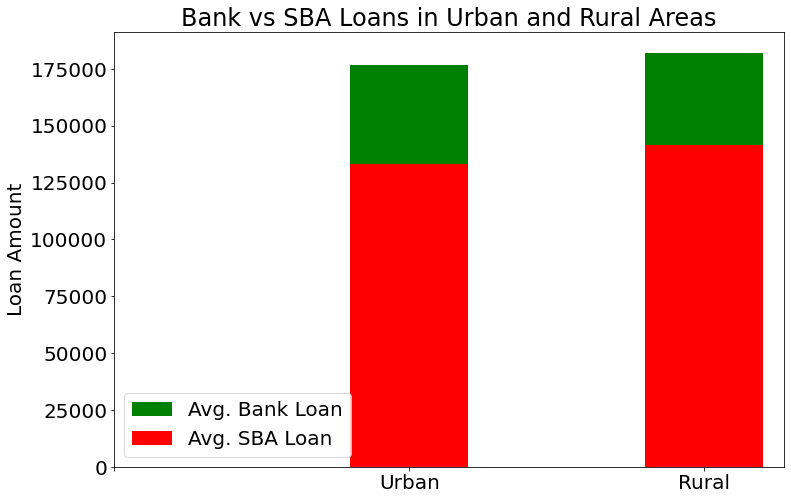

In [453]:
plt.figure(figsize=(12,8))
plt.bar(Urbanloans['UrbanRural'], Urbanloans['Average Bank Loan'], color ='green',width = 0.4, label='Avg. Bank Loan')
plt.bar(Urbanloans['UrbanRural'], Urbanloans['Average SBA Guaranteed Loan Amount'], color ='red',width = 0.4, label='Avg. SBA Loan')
plt.bar(Ruralloans['UrbanRural'], Ruralloans['Average Bank Loan'], color ='green',width = 0.4)
plt.bar(Ruralloans['UrbanRural'], Ruralloans['Average SBA Guaranteed Loan Amount'], color ='red', width = 0.4)
plt.rc('font', size=20)
plt.ylabel('Loan Amount')
plt.rc('font', size=20)
plt.title('Bank vs SBA Loans in Urban and Rural Areas')
plt.xticks(UrbanRuraldf['UrbanRural'], labels=['','Urban','Rural'])
plt.legend(loc='lower left')
plt.show()

# **Term:**

In [454]:
df.MIS_Status.replace(['P I F', 'CHGOFF'], [0,1], inplace = True)

In [455]:
termdefault = df.groupby('Term').agg({'MIS_Status': ['sum', 'count']})


In [456]:
termdefault.reset_index()

Term MIS_Status      
                sum count
0      0      734.0   806
1      1     1388.0  1604
2      2     1481.0  1809
3      3     1428.0  2107
4      4     1424.0  2166
..   ...        ...   ...
407  481        0.0     1
408  505        0.0     1
409  511        0.0     1
410  527        0.0     1
411  569        0.0     1

[412 rows x 3 columns]

In [457]:
termdefault.columns = ['Defaulted' , 'Total']

In [458]:
termdefault = termdefault.reset_index()

In [459]:
termdefault['percentage of defaults'] = termdefault['Defaulted'] / termdefault['Total'] *100

Text(0, 0.5, 'Percentage of Defaults')

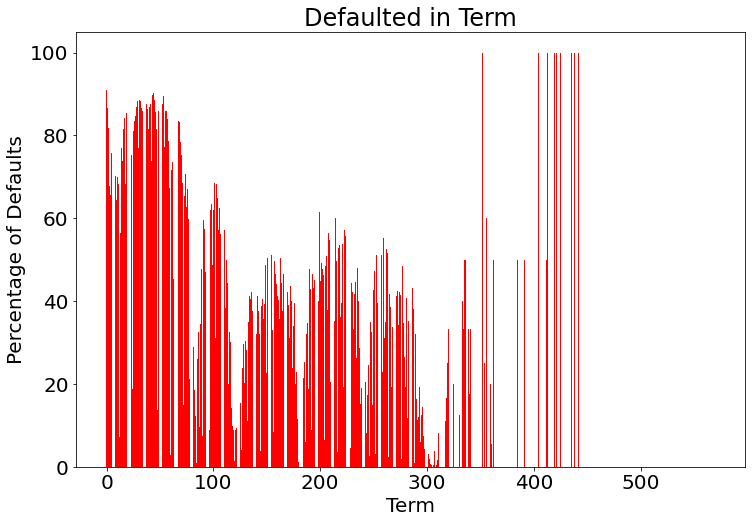

In [460]:
plt.figure(figsize=(12,8))
plt.bar(termdefault['Term'], termdefault['percentage of defaults'], color='red')
plt.title('Defaulted in Term')
plt.xlabel('Term')
plt.ylabel('Percentage of Defaults')

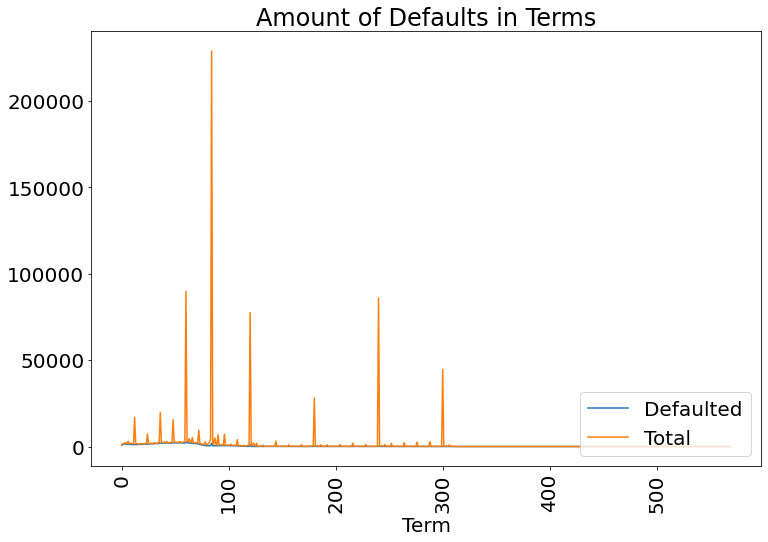

In [461]:
plt.figure(figsize=(12,8))
plt.plot(termdefault['Term'], termdefault['Defaulted'], label='Defaulted')
plt.plot(termdefault['Term'], termdefault['Total'], label='Total')
plt.rc('font', size=20)
plt.xlabel('Term')
plt.rc('font', size=20)
plt.legend(loc='lower right')
plt.title('Amount of Defaults in Terms')
plt.xticks(rotation = 90)
plt.show()

# **Banks:**

In [462]:
bankUR = df.groupby(['Bank', 'UrbanRural']).agg({'GrAppv':[np.sum]})
bankUR.head(20)

GrAppv
                                                 sum
Bank                           UrbanRural           
1ST & FARMERS BK HOLDING CO.   1             17500.0
1ST BANK                       0           1224545.0
                               1             45000.0
                               2           3205500.0
1ST BANK & TRUST               0           2793170.0
                               2            243000.0
1ST BANK, A DIVISION OF        0           2861848.0
                               1            368000.0
                               2           4328363.0
1ST BANK, NATIONAL ASSOCIATION 0           1244000.0
                               1            770600.0
1ST BK & TR CO                 0           3342850.0
                               1           3024250.0
                               2           2342513.0
1ST CAMERON STATE BANK         0             85000.0
                               1            130000.0
1ST CAP. BK OF KENTUCKY        1           8716969.0
                               2            900000.0
1ST CAPITAL BANK               1            500000.0
                               2            400000.0

In [463]:
df['Bank'].nunique()

5802

# **Revolving line of credit (most of the values are missing)**

In [464]:
df.columns

Index(['ID', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [465]:
df['RevLineCr'] = df['RevLineCr'].map(dict(Y=1, N=0))

In [466]:
RLC = df.groupby('UrbanRural').agg({'RevLineCr': [np.sum, 'count']})
RLC

RevLineCr        
                 sum   count
UrbanRural                  
0             7871.0  256603
1           166082.0  298743
2            27444.0   66339

In [467]:
RLC.reset_index()

UrbanRural RevLineCr        
                   sum   count
0          0    7871.0  256603
1          1  166082.0  298743
2          2   27444.0   66339

In [468]:
RLC.columns = ['Total RLC', "# of people"]

In [469]:
RLC = RLC.reset_index()

In [470]:
RLC['% of people w RLC'] = RLC['Total RLC'] / RLC['# of people'] * 100

In [471]:
RLC

,UrbanRural,Total RLC,# of people,% of people w RLC
0,0,7871.0,256603,3.067384
1,1,166082.0,298743,55.593604
2,2,27444.0,66339,41.369330


# **Low Doc**

In [472]:
df['LowDoc'] = df['LowDoc'].map(dict(Y=1, N=0))

In [473]:
LowDocUR = df.groupby('UrbanRural').agg({'LowDoc': [np.mean, np.sum, 'count'], 'MIS_Status': ['sum']})
LowDocUR

LowDoc                  MIS_Status
                mean      sum   count        sum
UrbanRural                                      
0           0.211555  67908.0  320995    22978.0
1           0.059668  27906.0  467690   114867.0
2           0.138994  14521.0  104472    19713.0

In [474]:
LowDocUR.reset_index()
LowDocUR

LowDoc                  MIS_Status
                mean      sum   count        sum
UrbanRural                                      
0           0.211555  67908.0  320995    22978.0
1           0.059668  27906.0  467690   114867.0
2           0.138994  14521.0  104472    19713.0

In [475]:
LowDocUR.columns = ['Average','Approved', 'Total', 'Defaulted']

In [476]:
LowDocUR = LowDocUR.reset_index()
LowDocUR

,UrbanRural,Average,Approved,Total,Defaulted
0,0,0.211555,67908.0,320995,22978.0
1,1,0.059668,27906.0,467690,114867.0
2,2,0.138994,14521.0,104472,19713.0


In [477]:
LowDocUR['% Approved'] = LowDocUR['Approved'] / LowDocUR['Total'] * 100

In [478]:
LowDocUR

,UrbanRural,Average,Approved,Total,Defaulted,% Approved
0,0,0.211555,67908.0,320995,22978.0,21.155470
1,1,0.059668,27906.0,467690,114867.0,5.966773
2,2,0.138994,14521.0,104472,19713.0,13.899418


In [479]:
lowdoc = df.groupby('LowDoc').agg({'MIS_Status': ['count', 'sum']})

In [480]:
lowdoc.reset_index()

LowDoc MIS_Status          
              count       sum
0    0.0     780997  146077.0
1    1.0     110171    9904.0

In [481]:
lowdoc.columns = ['Total', 'Defaulted']

In [482]:
lowdoc = lowdoc.reset_index()

In [483]:
lowdoc['Percentage of Defaults'] = lowdoc['Defaulted'] / lowdoc['Total'] *100

In [484]:
lowdoc

,LowDoc,Total,Defaulted,Percentage of Defaults
0,0.0,780997,146077.0,18.703913
1,1.0,110171,9904.0,8.989662


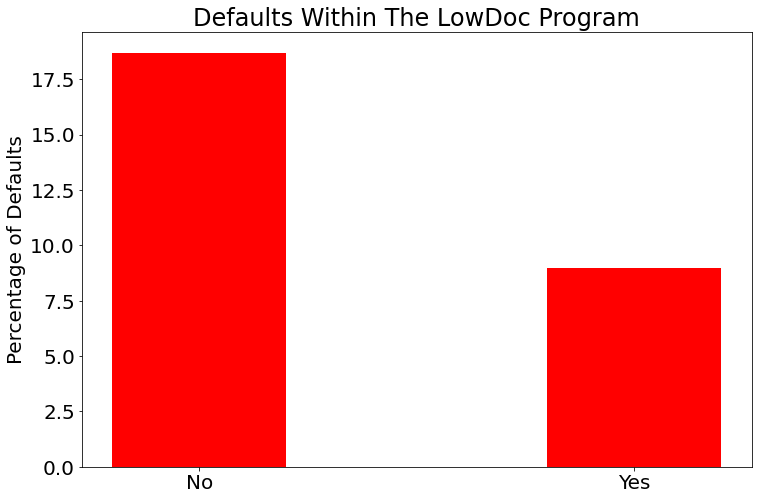

In [485]:
plt.figure(figsize=(12,8))
plt.bar(lowdoc['LowDoc'], lowdoc['Percentage of Defaults'], color ='red',width = 0.4)
plt.rc('font', size=20)
plt.ylabel('Percentage of Defaults')
plt.rc('font', size=20)
plt.title('Defaults Within The LowDoc Program')
plt.xticks(lowdoc['LowDoc'], labels=['No','Yes'])
plt.show()

# **MIS Status**

In [486]:
#df['MIS_Status'] = df['MIS_Status'].dropna()

In [487]:
#df['MIS_Status'].replace(to_replace=['PIF', 'CHGOFF'], value=[0, 1])

In [488]:
#df['MIS_Status'] = df['MIS_Status'].map(dict(CHGOFF=1, PIF=0))

In [489]:
df.MIS_Status.replace(['P I F', 'CHGOFF'], [0,1], inplace = True)

In [490]:
statusUR = df.groupby('UrbanRural').agg({'MIS_Status': [np.sum, 'count']})
statusUR

MIS_Status        
                  sum   count
UrbanRural                   
0             22978.0  322826
1            114867.0  469281
2             19713.0  105060

In [491]:
statusUR.reset_index()

UrbanRural MIS_Status        
                    sum   count
0          0    22978.0  322826
1          1   114867.0  469281
2          2    19713.0  105060

In [492]:
statusUR.columns = ['Defaulted', 'Total Loans']

In [493]:
statusUR = statusUR.reset_index()

In [494]:
statusUR

,UrbanRural,Defaulted,Total Loans
0,0,22978.0,322826
1,1,114867.0,469281
2,2,19713.0,105060


In [495]:
statusUR['% of Defaulted'] = statusUR['Defaulted'] / statusUR['Total Loans'] * 100

In [496]:
statusUR

,UrbanRural,Defaulted,Total Loans,% of Defaulted
0,0,22978.0,322826,7.117766
1,1,114867.0,469281,24.477232
2,2,19713.0,105060,18.763564


In [497]:
def make_scatterplot(df, x, y, figsize=(12, 8)):
    df.plot(x=x, 
            y=y, 
            kind='bar', 
            figsize=figsize,
            title=f'{x} vs {y}')

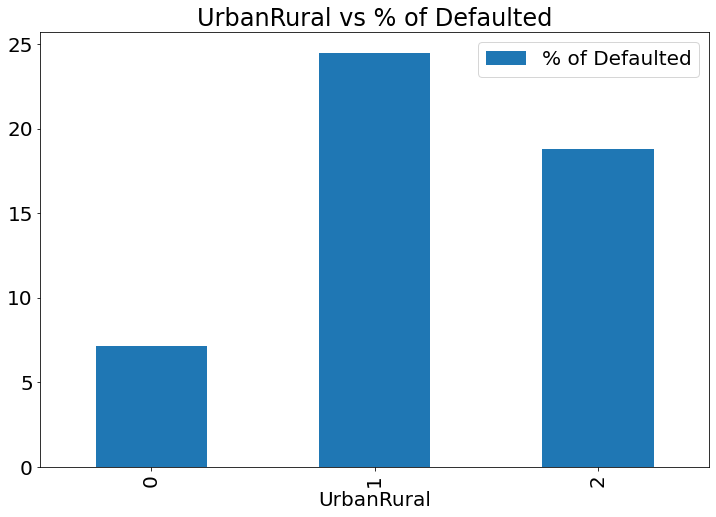

In [498]:
make_scatterplot(statusUR, x='UrbanRural', y='% of Defaulted')

In [499]:
statusUR.columns

Index(['UrbanRural', 'Defaulted', 'Total Loans', '% of Defaulted'], dtype='object')

In [500]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [501]:
#X = df[['UrbanRural', 'SBA_Appv', 'GrAppv']]
#y = df['MIS_Status']

In [502]:
#lr.fit(X, y)

In [503]:
#statusUR['lr_preds'] = lr.predict(y)

In [504]:
statusUR

,UrbanRural,Defaulted,Total Loans,% of Defaulted
0,0,22978.0,322826,7.117766
1,1,114867.0,469281,24.477232
2,2,19713.0,105060,18.763564


In [505]:
df.columns

Index(['ID', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [506]:
statestatus = df.groupby('State').agg({'MIS_Status': ['sum', 'count'], 'GrAppv': [np.mean], 'SBA_Appv': [np.mean]})

In [507]:
statestatus.reset_index()

State MIS_Status                 GrAppv       SBA_Appv
                sum   count           mean           mean
0     AK      281.0    2403  212524.522661  171441.439085
1     AL     1389.0    8360  218504.054413  182179.881846
2     AR     1064.0    6333  185459.841665  146079.418704
3     AZ     3657.0   17624  248330.128410  189595.180194
4     CA    24160.0  130488  263718.061155  207836.950658
5     CO     3671.0   20598  224932.275952  176335.124727
6     CT     1703.0   12127  168142.602257  121488.351623
7     DC      387.0    1613  152649.084935  117968.197148
8     DE      394.0    2193  143521.957658  107444.388288
9     FL    11274.0   41192  198424.634767  152805.400296
10    GA     5337.0   22272  267256.668896  207582.611079
11    HI      550.0    3607  123319.247368   95747.432410
12    IA     1382.0   11986  162362.312104  132262.529760
13    ID     1338.0    9496  157889.708781  127238.452937
14    IL     6709.0   29594  173805.517780  137500.724561
15    IN     2482.0   14079  181529.976083  141903.301444
16    KS     1497.0   11455  159590.774773  126388.945743
17    KY     1497.0    7720  165617.923605  127570.789719
18    LA     1730.0    9570  172429.912176  136428.212302
19    MA     3257.0   25092  134024.559196  100253.094057
20    MD     2614.0   13259  161552.422112  123969.507875
21    ME      583.0    5937  141316.889973  109258.657974
22    MI     4612.0   20493  187445.865223  139697.899100
23    MN     2849.0   24359  197978.461207  159017.039470
24    MO     3152.0   20652  160850.870297  129356.162733
25    MS     1218.0    7668  196389.327999  155145.293521
26    MT      594.0    8737  157086.539947  121874.816322
27    NC     2755.0   14286  187865.673010  147629.604519
28    ND      402.0    5237  167833.734032  134619.948904
29    NE      726.0    6381  160073.473066  127261.680551
30    NH     1289.0   12023  126577.801057   99607.702618
31    NJ     4829.0   24010  188373.139255  136461.065321
32    NM      658.0    6026  189022.911321  149761.147522
33    NV     1863.0    8022  216371.815055  176794.358923
34    NY    11450.0   57394  134155.598599   99254.545109
35    OH     5349.0   32498  157077.577340  119695.249801
36    OK     1544.0    9945  185915.352060  146183.539698
37    OR     1688.0   11041  191833.157180  149038.104244
38    PA     5089.0   34801  139707.987461  102796.507762
39    RI     1016.0    8948  122426.814577   88870.538990
40    SC     1145.0    5595  220800.566018  172844.342148
41    SD      349.0    4428  160781.728504  132267.438050
42    TN     1994.0    9400  205275.693289  160952.255450
43    TX    13265.0   70401  217590.585001  165358.156292
44    UT     3316.0   18772  154995.601300  123653.351140
45    VA     2487.0   13207  192453.111354  151350.415109
46    VT      404.0    5433  145305.416208  110884.102860
47    WA     3268.0   23255  202777.397627  158389.319864
48    WI     2560.0   21021  206700.429658  162204.617538
49    WV      530.0    3285  150890.404320  116623.375114
50    WY      199.0    2838  174031.603029  140380.799930

In [508]:
statestatus.columns = ['Defaulted', 'Total', 'Bank Loan', 'SBA Loan']

In [509]:
statestatus = statestatus.reset_index()

In [510]:
statestatus['Percentage of Defaulted'] = statestatus['Defaulted'] / statestatus['Total'] * 100

In [511]:
statestatus.columns 

Index(['State', 'Defaulted', 'Total', 'Bank Loan', 'SBA Loan',
       'Percentage of Defaulted'],
      dtype='object')

<ipython-input-512-080801e537d3>:10: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right')


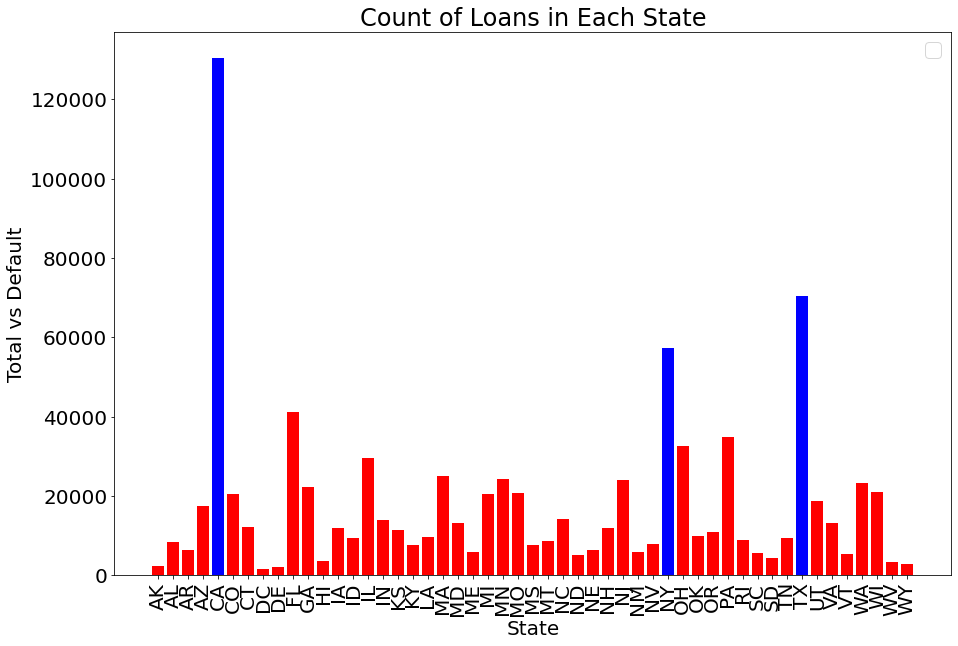

In [512]:
plt.figure(figsize=(15,10))
plt.bar(statestatus['State'], statestatus['Total'], color = ['r','r','r','r','b','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','b','r','r','r','r','r','r','r','r','b','r','r','r','r','r','r'])

plt.rc('font', size=20)
plt.xlabel('State')
plt.ylabel('Total vs Default')
plt.rc('font', size=20)
plt.title('Count of Loans in Each State')
plt.xticks(rotation = 90)
plt.legend(loc='top right')
plt.savefig('Stateloancounts.png')
plt.show()

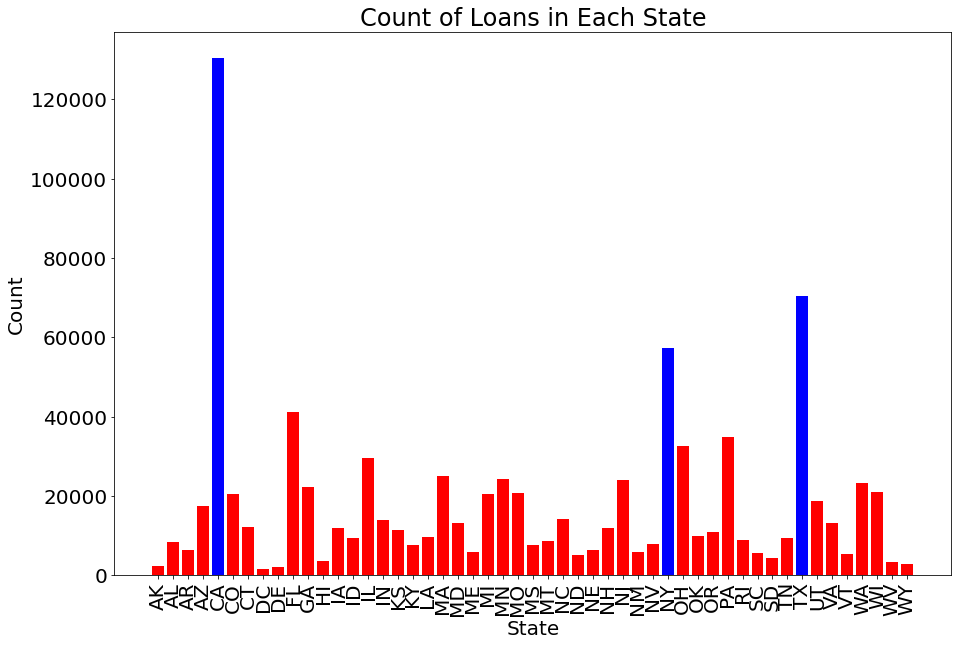

In [513]:
plt.figure(figsize=(15,10))
plt.bar(statestatus['State'], statestatus['Total'], color = ['r','r','r','r','b','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','b','r','r','r','r','r','r','r','r','b','r','r','r','r','r','r'])

plt.rc('font', size=20)
plt.xlabel('State')
plt.ylabel('Count')
plt.rc('font', size=20)
plt.title('Count of Loans in Each State')
plt.xticks(rotation = 90)
plt.savefig('Stateloancountss.png')
plt.show()

In [514]:
df_sorted_desc= statestatus.sort_values('Percentage of Defaulted',ascending=False)


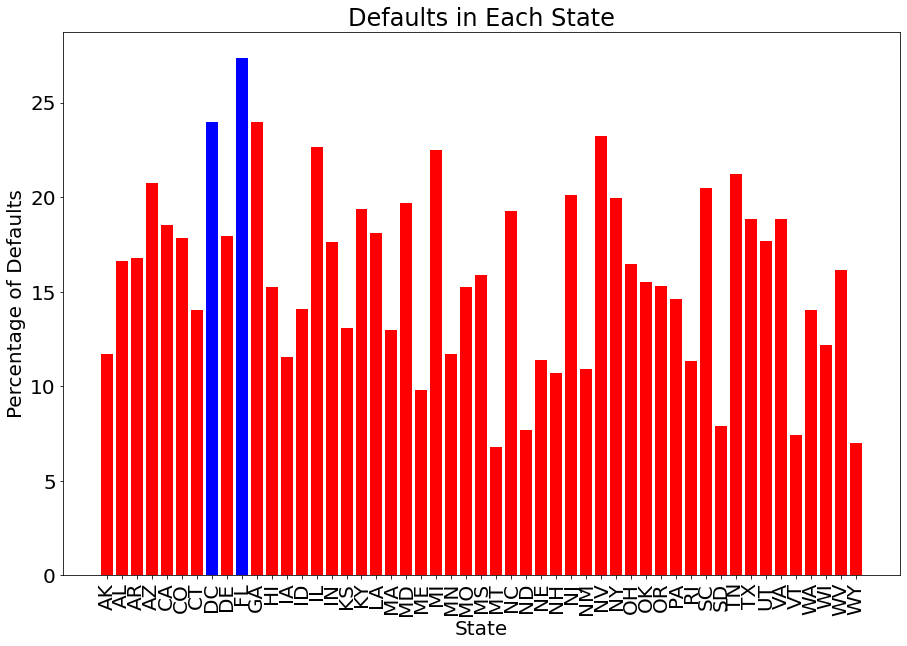

In [545]:
plt.figure(figsize=(15,10))
plt.bar(statestatus['State'], statestatus['Percentage of Defaulted'],data=df_sorted_desc, color=['r','r','r','r','r','r','r','b','r','b','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r'])
plt.rc('font', size=20)
plt.xlabel('State')
plt.ylabel('Percentage of Defaults')
plt.rc('font', size=20)
plt.title('Defaults in Each State')
plt.xticks(rotation = 90)
plt.savefig('newStatedefaults.png')
plt.show()

In [516]:
statestatus

,State,Defaulted,Total,Bank Loan,SBA Loan,Percentage of Defaulted
0,AK,281.0,2403,212524.522661,171441.439085,11.693716
1,AL,1389.0,8360,218504.054413,182179.881846,16.614833
2,AR,1064.0,6333,185459.841665,146079.418704,16.800884
3,AZ,3657.0,17624,248330.128410,189595.180194,20.750113
4,CA,24160.0,130488,263718.061155,207836.950658,18.515113
5,CO,3671.0,20598,224932.275952,176335.124727,17.822119
6,CT,1703.0,12127,168142.602257,121488.351623,14.043044
7,DC,387.0,1613,152649.084935,117968.197148,23.992560
8,DE,394.0,2193,143521.957658,107444.388288,17.966256
9,FL,11274.0,41192,198424.634767,152805.400296,27.369392


#**CHGOFF DATE**

In [517]:
Default = df.groupby('ChgOffDate').sum()
Default

,ID,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
ChgOffDate,,,,,,,,,,,,,,,,
1-Apr-01,63742137077,960439,4627442,547,126,23.0,4,9,20,1,8.0,0.0,513914.0,20.0,461200.0,230600.0
1-Apr-02,86373559106,1307167,5706981,913,76,27.0,13,27,60819,6,6.0,4.0,1473595.0,21.0,1464100.0,996050.0
1-Apr-03,36423747068,577959,2840480,730,43,22.0,0,0,60055,5,0.0,7.0,1944000.0,12.0,1944000.0,1412196.0
1-Apr-04,52576052059,660828,2494347,803,107,15.0,35,64,11,9,2.0,3.0,2437784.0,11.0,2437900.0,1834515.0
1-Apr-05,35219457026,314595,3096099,188,61,9.0,2,36,7,5,1.0,2.0,899000.0,7.0,899000.0,648500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-Sep-94,9373909015,117403,0,91,31,4.0,0,0,28555,0,0.0,0.0,525000.0,3.0,525000.0,424800.0
9-Sep-96,28505425032,237832,1318952,422,27,5.0,0,0,5,0,0.0,0.0,442918.0,5.0,457918.0,386376.0
9-Sep-97,8980613006,96720,421620,68,4,1.0,0,0,1,0,0.0,0.0,69235.0,1.0,75000.0,60000.0


In [518]:
df.columns

Index(['ID', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [519]:
years = df.groupby('ApprovalDate').agg({'GrAppv':[np.mean]})
years

,GrAppv
,mean
ApprovalDate,
1-Apr-02,266913.223140
1-Apr-03,161114.686099
1-Apr-04,149947.169811
1-Apr-05,159374.351585
1-Apr-06,35833.333333
...,...
9-Sep-94,203606.981366
9-Sep-96,236328.430303


# **NACIS**




In [520]:
sectordf = pd.read_csv('/content/drive/MyDrive/Data Science/NAICS Sector - Sheet1 - NAICS Sector - Sheet1 - NAICS Sector - Sheet1 - NAICS Sector - Sheet1.csv')

In [521]:
df['Sectornum'] = df['NAICS'].astype(str).str[:2].astype(int)

In [522]:
sectordf.head()

,Sector,Description
0,11,Agriculture
1,21,Mining
2,22,Utilities
3,23,Construction
4,31,Manufacturing


In [523]:
df.head()

,ID,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Sectornum
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0.0,1.0,NaN,28-Feb-99,60000.0,0.0,$0.00,60000.0,48000.0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0.0,1.0,NaN,31-May-97,40000.0,0.0,$0.00,40000.0,32000.0,72
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0.0,0.0,NaN,31-Dec-97,287000.0,0.0,$0.00,287000.0,215250.0,62
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0.0,1.0,NaN,30-Jun-97,35000.0,0.0,$0.00,35000.0,28000.0,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,0.0,0.0,NaN,14-May-97,229000.0,0.0,$0.00,229000.0,229000.0,0


In [524]:
NAICSsector = pd.merge(sectordf, df, left_on='Sector', right_on='Sectornum', how='right')

In [525]:
NAICSsector.head()

,Sector,Description,ID,Name,City,State,Zip,Bank,BankState,NAICS,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Sectornum
0,45.0,Retail trade,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,...,0.0,1.0,NaN,28-Feb-99,60000.0,0.0,$0.00,60000.0,48000.0,45
1,72.0,Food services,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,...,0.0,1.0,NaN,31-May-97,40000.0,0.0,$0.00,40000.0,32000.0,72
2,62.0,Health care,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,...,0.0,0.0,NaN,31-Dec-97,287000.0,0.0,$0.00,287000.0,215250.0,62
3,NaN,NaN,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,...,0.0,1.0,NaN,30-Jun-97,35000.0,0.0,$0.00,35000.0,28000.0,0
4,NaN,NaN,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,...,0.0,0.0,NaN,14-May-97,229000.0,0.0,$0.00,229000.0,229000.0,0


In [526]:
len(df)

899164

In [527]:
len(NAICSsector)

899164

In [528]:
NAICSsector.to_csv('data_with_sectors.csv', index=False)

In [529]:
from sklearn.linear_model import LinearRegression

In [530]:
#lr = LinearRegression()

In [531]:
#X = NAICSsector[['Description']]
#y = NAICSsector[['GrAppv']]

In [544]:
NAICSDESSBA = NAICSsector.groupby(['Description', 'UrbanRural']).agg({'SBA_Appv': [np.mean, 'count', 'min', 'max'], 'MIS_Status': ['sum']})

In [ ]:
NAICSDESSBA.reset_index()

In [535]:
NAICSDESSBA.columns= ['Average', 'Count of Businesses', 'Minimum Loan', 'Maximum Loan', 'Amount Defaulted']

In [536]:
NAICSDESSBA = NAICSDESSBA.reset_index()

In [537]:
NAICSDESSBA['Percentage of Defaulted'] = NAICSDESSBA['Amount Defaulted'] / NAICSDESSBA['Count of Businesses'] * 100

In [538]:
SectorUrban = NAICSDESSBA[NAICSDESSBA['UrbanRural'] == 1]

In [539]:
SectorRural = NAICSDESSBA[NAICSDESSBA['UrbanRural'] == 2]

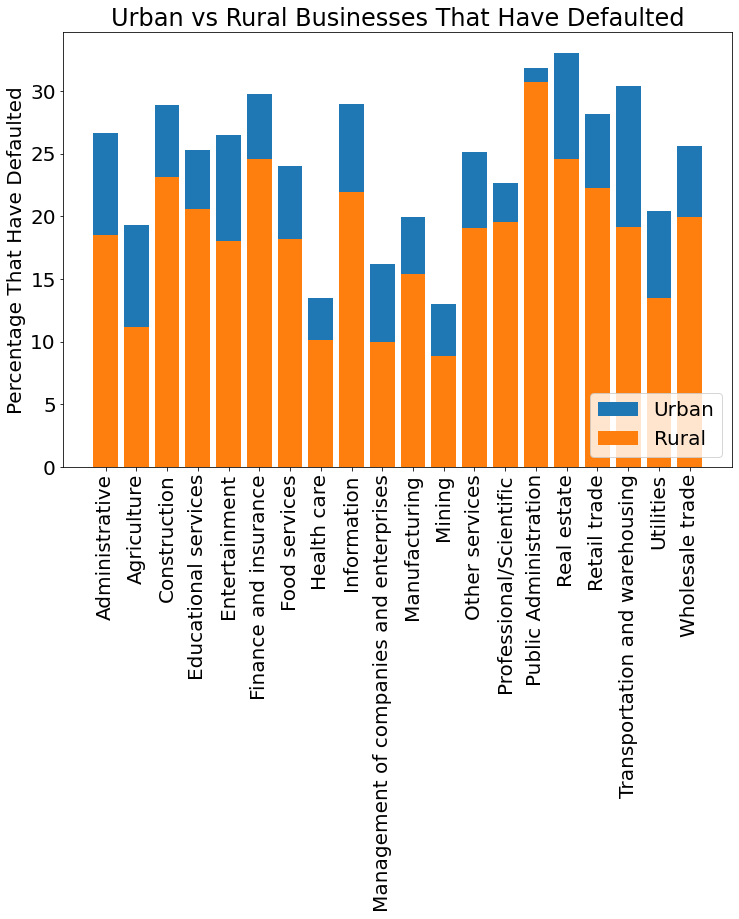

In [540]:
plt.figure(figsize=(12,8))
plt.bar(SectorUrban['Description'], SectorUrban['Percentage of Defaulted'], label='Urban')
plt.bar(SectorRural['Description'], SectorRural['Percentage of Defaulted'], label='Rural')
plt.rc('font', size=20)
plt.ylabel('Percentage That Have Defaulted')
plt.rc('font', size=20)
plt.legend(loc='lower right')
plt.title('Urban vs Rural Businesses That Have Defaulted')
plt.xticks(rotation = 90)
plt.show()